In [1]:
import numpy as np
from numpy import mean, square, sqrt
import pandas as pd
import os
from pandas import read_csv
import glob
import matplotlib.pyplot as plt
import scipy.fftpack
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import math
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.python.client import device_lib

# 정상데이터
## vib1 =  3/16(motor), vib2 = 3/17(motor)

In [3]:
vib1 = pd.read_csv("D:/injection machine/data/vibration/03_16/VIB_0316_motor_51200.csv", sep = '\t', names = ['time', 'data'], header = None, encoding = 'CP949')
vib2 = pd.read_csv("D:/injection machine/data/vibration/03_17/VIB_0317_motor_51200.csv", sep = '\t', names = ['time', 'data'], header = None, encoding = 'CP949')


In [4]:
vib1.shape

(142975250, 2)

In [5]:
Motor1 = vib1['data'][10000000:25000000]
Motor2 = vib2['data'][:15000000]


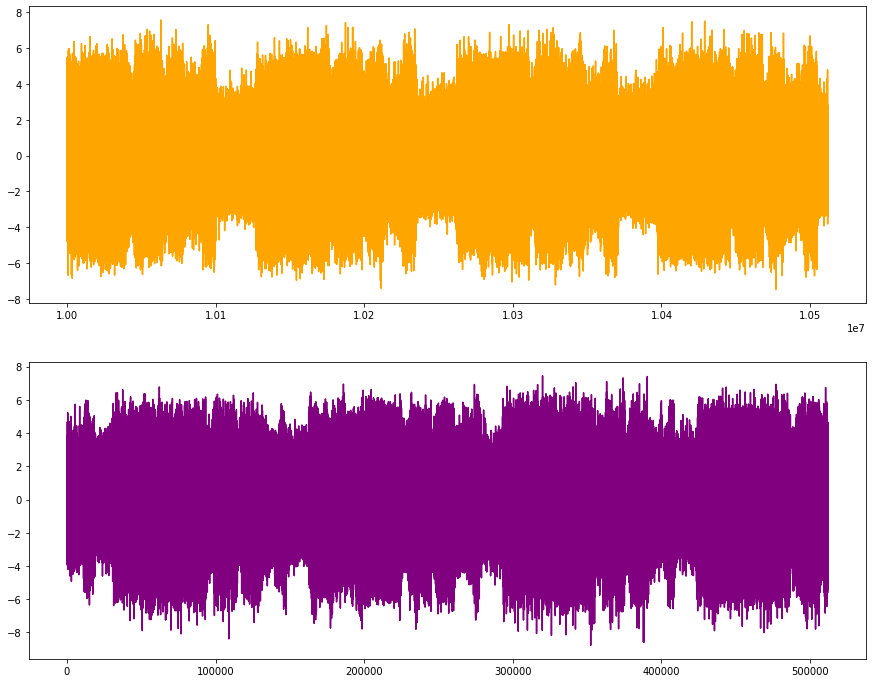

In [7]:
#데이터 총 길이 확인
figure, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(15,12))
ax1.plot(Motor1[0:512000], color = 'orange')
ax2.plot(Motor2[0:512000], color = 'purple')


In [8]:
motor1 = Motor1.to_numpy()
motor2 = Motor2.to_numpy()


motor1 = motor1.reshape(-1, 1)
motor2 = motor2.reshape(-1, 1)


# 이상데이터 
## 적재장치 데이터

In [9]:
geonho = pd.read_csv("D:/injection machine/data/Geonho/abnormal/20220331/4_continuous_0_2600fault.csv", sep = '\t', names = ['time', 'data'], header = None, encoding = 'CP949')

In [10]:
#정상, 이상데이터 확인.
print(vib1.head())
print(vib2.head())
print(geonho.head())

                    time      data
0  2022-03-16 오전 9:54:02 -1.150294
1  2022-03-16 오전 9:54:02 -1.512067
2  2022-03-16 오전 9:54:02  3.347695
3  2022-03-16 오전 9:54:02  2.698150
4  2022-03-16 오전 9:54:02 -0.709157
                    time      data
0  2022-03-17 오후 2:44:20 -1.313107
1  2022-03-17 오후 2:44:20 -1.040817
2  2022-03-17 오후 2:44:20  3.755855
3  2022-03-17 오후 2:44:20 -0.536164
4  2022-03-17 오후 2:44:20  0.056753
                     time      data
0  2022-03-31 오전 10:17:37  0.165971
1  2022-03-31 오전 10:17:37  0.096314
2  2022-03-31 오전 10:17:37 -0.110070
3  2022-03-31 오전 10:17:37 -0.017784
4  2022-03-31 오전 10:17:37  0.148563


In [11]:
#정상데이터와 비교를 위해 이상데이터에서 동일 구간 추출
vib2_abnormal_geonho = geonho['data'][:15000000]

In [12]:
vib2_abnormal_np = vib2_abnormal_geonho.to_numpy()
vib2_abnormal = vib2_abnormal_np.reshape(-1, 1)

# 데이터 그래프화

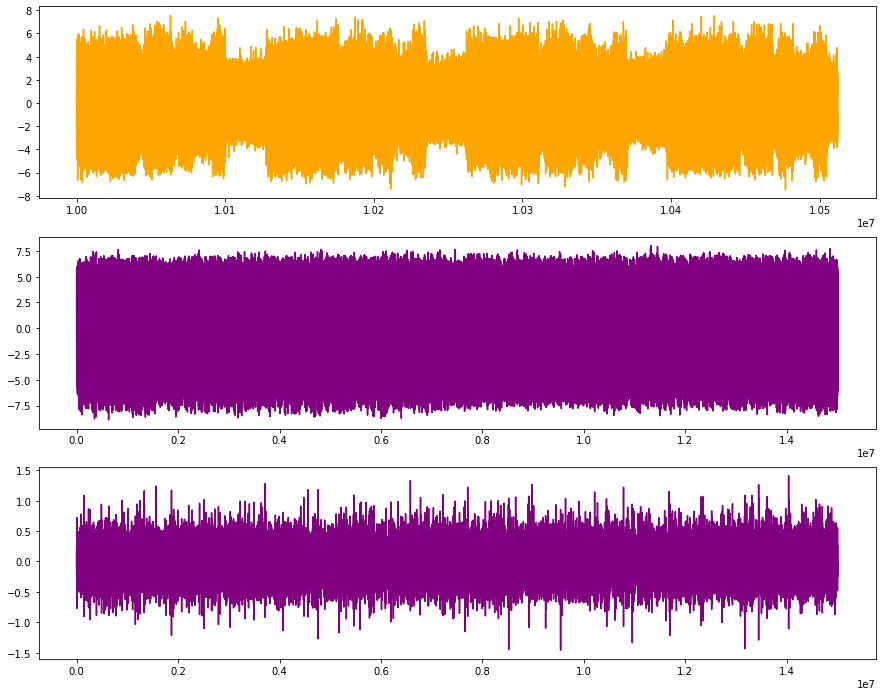

In [14]:
#데이터 총 길이 확인
figure, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(15,12))
ax1.plot(Motor1[0:512000], color = 'orange')
ax2.plot(Motor2, color = 'purple')
ax3.plot(vib2_abnormal[:15000000], color = 'purple')

# 정상, 이상 데이터 FFT 확인

In [108]:
ND = Motor2[0:450000]
AD = vib2_abnormal[0:450000]

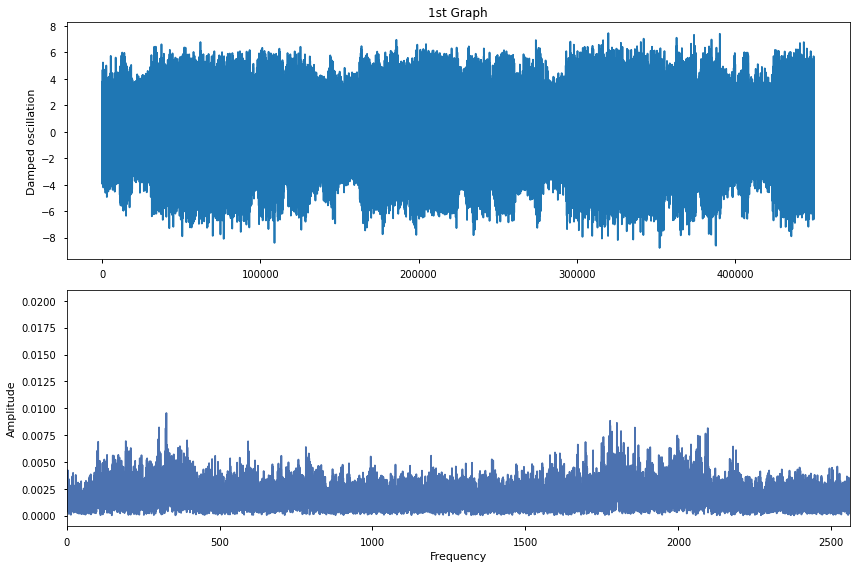

In [109]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Fs = 51200
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

# Signal x (20Hz) + Signal y (50Hz)
N_H = len(ND)

k = np.arange(N_H)
T = N_H/ Fs
freq = k / T
freq = freq[range(int(N_H/2))]

# FFT 적용
yfft = np.fft.fft(ND)
yf = yfft / N_H
yf = yf[range(int(N_H/2))]

plt.rcParams["figure.figsize"] = (12,8)

# FFT 출력
plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(ND)
plt.title('1st Graph')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(freq, abs(yf), 'b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, Fs / 20)
plt.tight_layout()
plt.show()

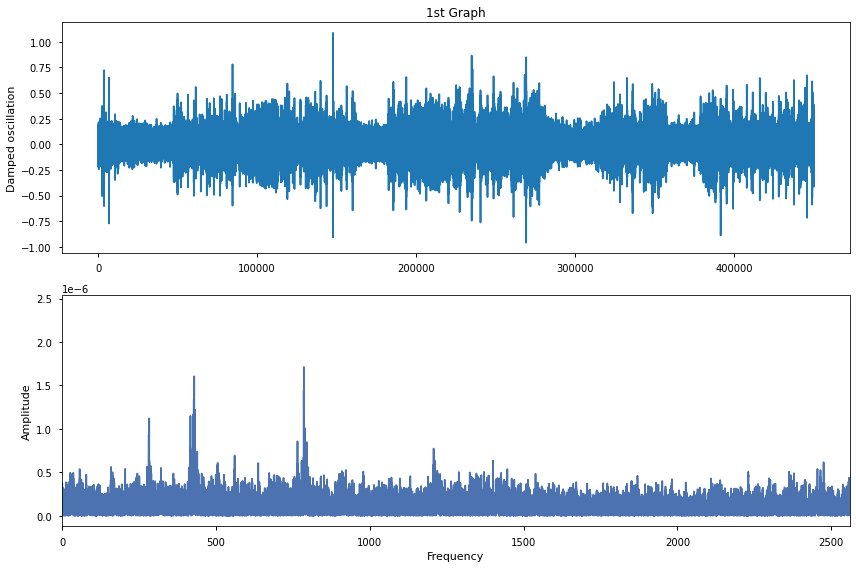

In [111]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Fs = 51200
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

# Signal x (20Hz) + Signal y (50Hz)
N_H = len(AD)

k = np.arange(N_H)
T = N_H/ Fs
freq = k / T
freq = freq[range(int(N_H/2))]

# FFT 적용
yfft = np.fft.fft(AD)
yf = yfft / N_H
yf = yf[range(int(N_H/2))]

plt.rcParams["figure.figsize"] = (12,8)

# FFT 출력
plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1
plt.plot(AD)
plt.title('1st Graph')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
plt.plot(freq, abs(yf), 'b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, Fs / 20)
#plt.ylim(0,0.002)
plt.tight_layout()
plt.show()

# Scaler

## 1. MaxAbsScaler

In [15]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# MaxAbsScaler 선언 및 학습
maxAbsScaler = MaxAbsScaler().fit(motor1)
motor1_sc = maxAbsScaler.transform(motor1)

standardScaler = MaxAbsScaler().fit(motor2)
motor2_sc = maxAbsScaler.transform(motor2)

standardScaler = MaxAbsScaler().fit(vib2_abnormal)
vib2_abnormal_sc = maxAbsScaler.transform(vib2_abnormal)

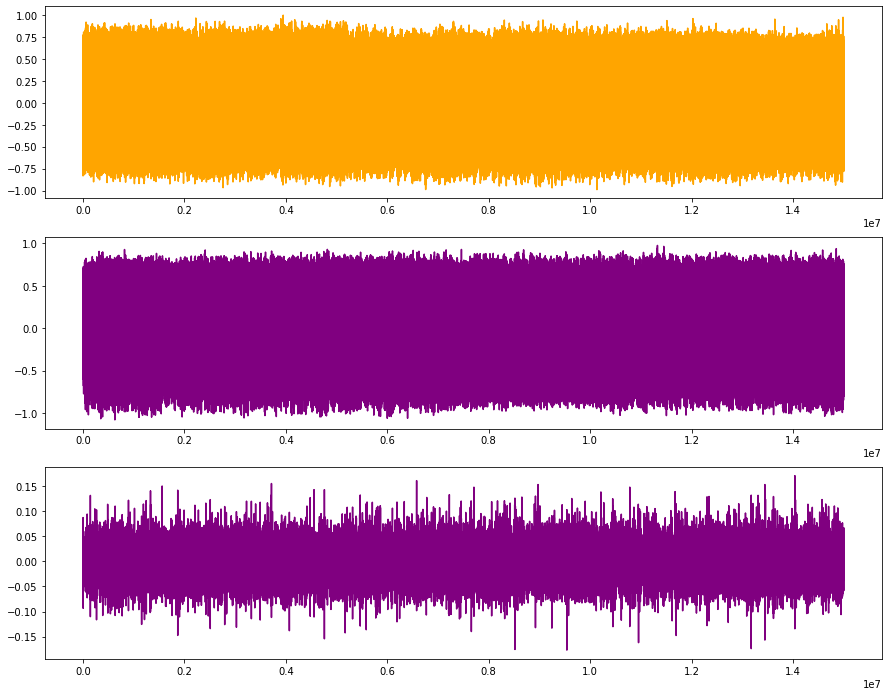

In [16]:
figure, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, figsize=(15,12))
ax1.plot(motor1_sc, color = 'orange')
ax2.plot(motor2_sc, color = 'purple')
ax3.plot(vib2_abnormal_sc, color = 'purple')

# Reshape

In [17]:
M1 = np.concatenate((motor1_sc), axis=0, out= None) 
M2 = np.concatenate((motor2_sc), axis=0, out= None) 
M3 = np.concatenate((vib2_abnormal_sc), axis=0, out= None) 

In [18]:
print(M1.shape)
print(M2.shape)
print(M3.shape)

(15000000,)
(15000000,)
(15000000,)


In [19]:
M_1 = M1.reshape(5000,3000)
M_2 = M2.reshape(5000,3000)
M_3 = M3.reshape(5000,3000)

print(M_1.shape)
print(M_2.shape)
print(M_3.shape)

(5000, 3000)
(5000, 3000)
(5000, 3000)


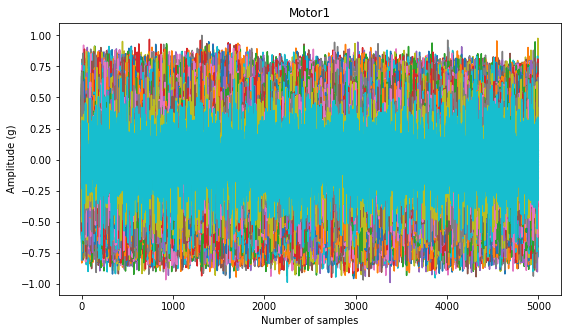

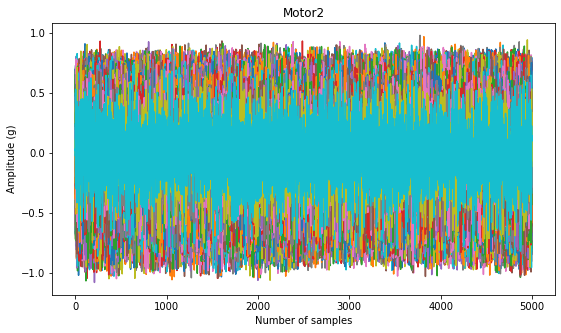

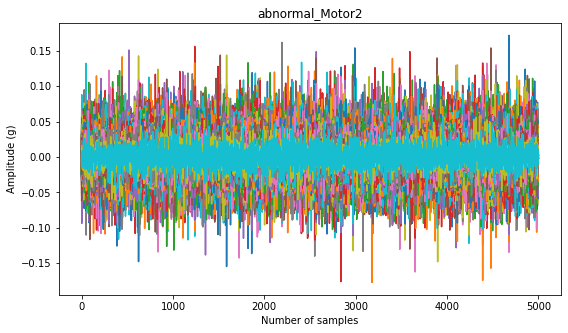

In [50]:
plt.figure(figsize=(9,5))
plt.plot(M_1)
plt.title('Motor1')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (g)')
plt.show()

plt.figure(figsize=(9,5))
plt.plot(M_2)
plt.title('Motor2')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (g)')
plt.show()

plt.figure(figsize=(9,5))
plt.plot(M_3)
plt.title('abnormal_Motor2')
plt.xlabel('Number of samples')
plt.ylabel('Amplitude (g)')
plt.show()

# 정상 데이터 특징 추출

## 정상데이터는 모든 특징 추출 후 상관계수에 따라 특징 선정 

In [20]:
import scipy
import scipy.stats
from numpy import mean, square, sqrt
from scipy.stats import kurtosis
from scipy.stats import skew
from collections import Counter
from scipy.stats import kurtosis
from scipy.stats import skew

In [21]:
def FT(Hss):
    
    s, size = Hss.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.mean(Hss[:, i])  #compute mean for each signal
        a.append(x)  #store the value to empty array

    Mean_H = np.array(a) #convert list to array
    Mean_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.max(Hss[:, i])  #compute max for each signal
        a.append(x)  #store the value to empty array

    MAX_H = np.array(a) #convert list to array
    MAX_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.min(Hss[:, i])  #compute min for each signal
        a.append(x)  #store the value to empty array

    MIN_H = np.array(a) #convert list to array
    MIN_H.shape

    from numpy import sqrt, mean, square

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sqrt(mean(square(Hss[:, i])))  #compute rms for each signal
        a.append(x)  #store the value to empty array

    RMS_H = np.array(a) #convert list to array
    RMS_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.std(Hss[:, i])  #compute standard deviation(표준편차) for each signal
        a.append(x)  #store the value to empty array

    STD_H = np.array(a) #convert list to array
    STD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.var(Hss[:, i])  #compute Variance for each signal
        a.append(x)  #store the value to empty array

    VAR_H = np.array(a) #convert list to array
    VAR_H.shape

    from scipy.stats import kurtosis

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = kurtosis(Hss[:, i])  #compute Kurtosis for each signal
        a.append(x)  #store the value to empty array

    KUR_H = np.array(a) #convert list to array
    KUR_H.shape

    from scipy.stats import skew

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = skew(Hss[:, i])  #compute Skewness for each signal
        a.append(x)  #store the value to empty array

    SKEW_H = np.array(a) #convert list to array
    SKEW_H.shape

    from scipy.stats import gstd

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = gstd(abs(Hss[:, i]))  #compute GSTD for each signal
        a.append(x)  #store the value to empty array

    GSTD_H = np.array(a) #convert list to array
    GSTD_H.shape

    from scipy.stats import iqr

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = iqr(Hss[:, i])  #compute IQR for each signal
        a.append(x)  #store the value to empty array

    IQR_H = np.array(a) #convert list to array
    IQR_H.shape

    from scipy.stats import sem

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sem(Hss[:, i])  #compute SEM for each signal
        a.append(x)  #store the value to empty array

    SEM_H = np.array(a) #convert list to array
    SEM_H.shape

    #from scipy.stats import median_abs_deviation

    #a = [] #create an empty list

    #for i in range(size):  #run a loop to compute every signal in the variable
    #    x = median_abs_deviation(Hss[:, i])  #compute MAD for each signal
    #    a.append(x)  #store the value to empty array

    #MAD_H = np.array(a) #convert list to array
    #MAD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = max(Hss[:, i])/RMS_H[i]  #compute Crest Factor for each signal
        a.append(x)  #store the value to empty array

    CF_H = np.array(a) #convert list to array
    CF_H.shape
    
    Motor_FT= pd.DataFrame([Mean_H, RMS_H, VAR_H, STD_H,
                               GSTD_H, IQR_H, SEM_H, MAX_H, MIN_H,
                               KUR_H, SKEW_H, CF_H]).T

    names = ['Mean', 'RMS', 'VAR', 'STD', 'GSTD',
            'IQR', 'SEM', 'MAX_H', 'MIN_H',
            'KUR', 'SKEW', 'CF']
    Motor_FT.columns=names
    #Motor_FT['State'] = 0

    return Motor_FT

In [22]:
FT_M1 = FT(M_1)
FT_M1['State'] = 0
FT_M2 = FT(M_2)
FT_M2['State'] = 1
FT_M2.head()


,Mean,RMS,VAR,STD,GSTD,IQR,SEM,MAX_H,MIN_H,KUR,SKEW,CF,State
0,0.002038,0.216537,0.046884,0.216527,3.151690,0.275142,0.003062,0.840203,-0.908472,0.411813,-0.040073,3.880182,1
1,0.005796,0.219220,0.048024,0.219143,3.087837,0.285416,0.003099,0.787975,-0.807690,0.298135,-0.121760,3.594452,1
2,-0.002209,0.220903,0.048793,0.220892,3.121838,0.278105,0.003124,0.748038,-0.817204,0.439628,-0.140155,3.386280,1
3,-0.005651,0.221547,0.049051,0.221475,2.982173,0.280832,0.003132,0.764509,-0.866009,0.276265,-0.144205,3.450780,1
4,-0.001251,0.220361,0.048557,0.220357,3.201756,0.276940,0.003117,0.761753,-0.842922,0.531797,-0.140396,3.456847,1


In [23]:
FT_M2.shape

(3000, 13)

# 정상데이터 상관계수 비교

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math as m
import warnings
warnings.filterwarnings('ignore')
import time
from time import time
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.2)
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-notebook')

In [25]:
Feat_Com = pd.concat([FT_M1, FT_M2], axis = 0)  #combine matrices 1000+1000+!000 #axis = 1
Feat_Com.shape

(6000, 13)

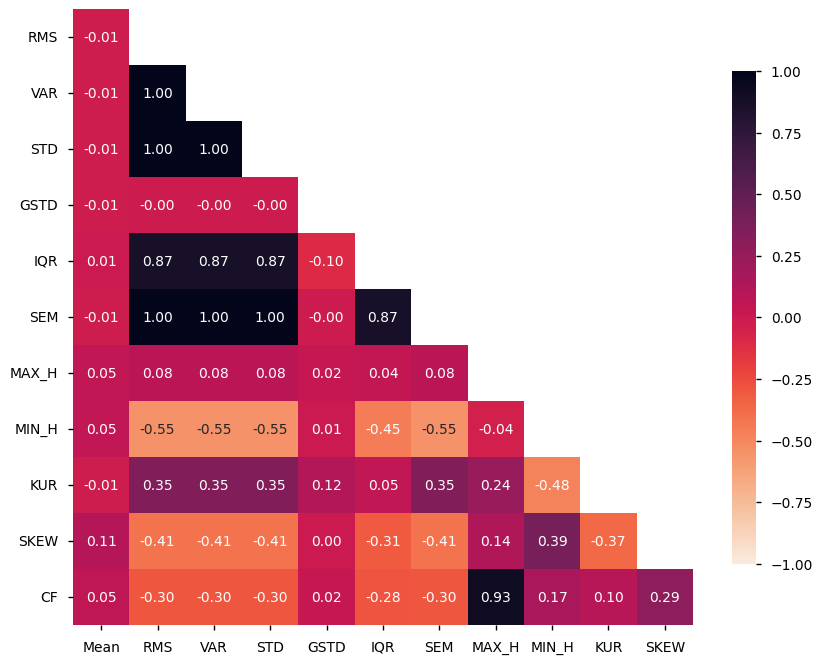

In [26]:
df_corr = Feat_Com.drop('State',1).corr()

fig, ax = plt.subplots(figsize=(10, 8)) #mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool)) #adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy() #plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='rocket_r',
            vmin=-1, vmax=1, cbar_kws={"shrink": .8}) #yticks
plt.yticks(rotation=0)
plt.ylim(11,0)
plt.show()

In [27]:
df_n = Feat_Com.drop(['State'], 1)
threshold = 0.6  #maximum value of similarity accept
df_corr = df_n.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i, j] >= threshold:
            if columns[j]:
                columns[j] = False
                
selected_columns = df_n.columns[columns]
selected_columns
df_n = df_n[selected_columns]

df_n['KUR'] = Feat_Com['KUR']
df_n['State'] = Feat_Com['State']
Feat_reduced = df_n
print(Feat_reduced.head())
print(Feat_reduced.shape)

       Mean       RMS      GSTD     MAX_H     MIN_H       KUR      SKEW  State
0  0.000461  0.211402  3.180960  0.879650 -0.749638  0.459290 -0.028276      0
1  0.004685  0.209921  3.163005  0.842418 -0.849827  0.194250 -0.044556      0
2 -0.003946  0.211252  3.054832  0.739473 -0.913910  0.246307 -0.121473      0
3 -0.000333  0.209424  3.019189  0.848390 -0.837476  0.307181 -0.028865      0
4 -0.001623  0.211130  3.153581  0.749120 -0.750461  0.298519 -0.053490      0
(6000, 8)


In [28]:
Feat_reduced

,Mean,RMS,GSTD,MAX_H,MIN_H,KUR,SKEW,State
0,0.000461,0.211402,3.180960,0.879650,-0.749638,0.459290,-0.028276,0
1,0.004685,0.209921,3.163005,0.842418,-0.849827,0.194250,-0.044556,0
2,-0.003946,0.211252,3.054832,0.739473,-0.913910,0.246307,-0.121473,0
3,-0.000333,0.209424,3.019189,0.848390,-0.837476,0.307181,-0.028865,0
4,-0.001623,0.211130,3.153581,0.749120,-0.750461,0.298519,-0.053490,0
...,...,...,...,...,...,...,...,...
2995,-0.002867,0.221690,3.052500,0.792391,-1.019189,0.370697,-0.123184,1
2996,0.001925,0.219747,3.114366,0.876820,-0.950305,0.329854,-0.118482,1
2997,0.004708,0.218686,3.140189,0.859845,-0.844529,0.429710,-0.091186,1
2998,-0.000950,0.221273,3.077907,0.844723,-0.874011,0.389432,-0.089176,1


# 정상 데이터 차원 축소
## 1. PCA

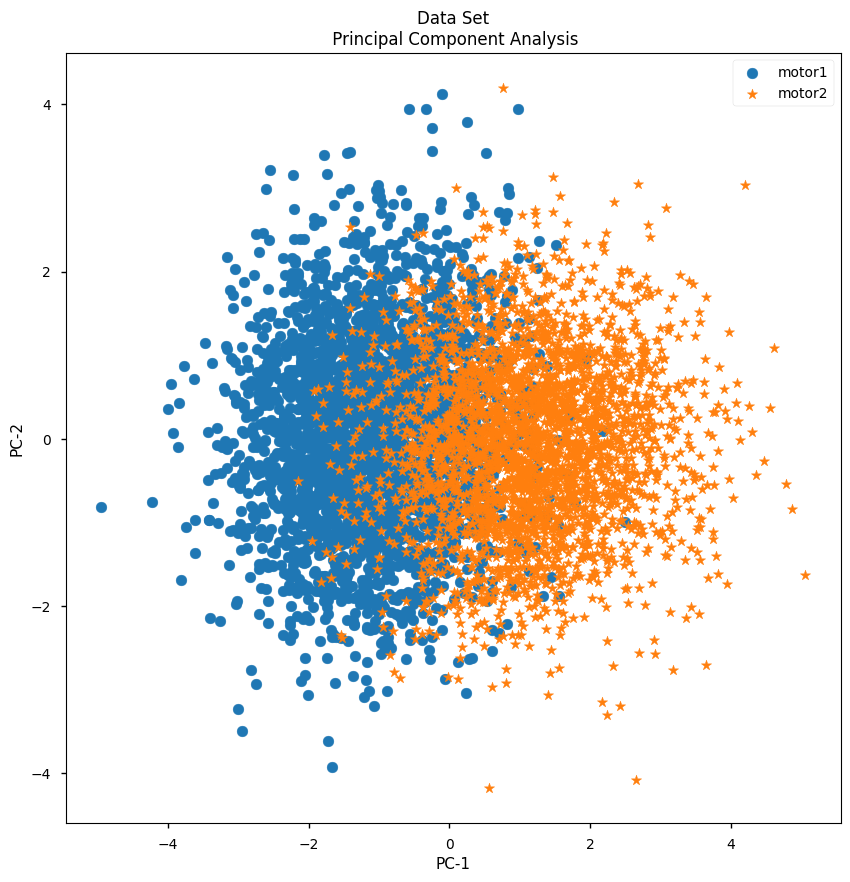

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
  
X = Feat_reduced.drop(['State'], 1)  #Selecting only the feature
y = Feat_reduced['State']            #Selecting only the classes

X = StandardScaler().fit_transform(X) # x객체에 x를 표준화한 데이터를 저장

X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X_pca[y.values==0,0], X_pca[y.values==0,1], alpha=1, marker='o', label='motor1', s=60)
plt.scatter(X_pca[y.values==1,0], X_pca[y.values==1,1], alpha=1, marker='*', label='motor2', s=60)
#plt.scatter(principalDf['x1'], principalDf['x2'], color = 'black', label = 'pca') # 이상데이터 추가

plt.legend()
plt.title('Data Set\n Principal Component Analysis')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
#plt.gca().set_aspect('equal')
plt.show()

# 이상 데이터 특징 추출

## 정상데이터에서 선정된 특징만 추출

In [36]:
def ab_FT(Hss):
    
    s, size = Hss.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.mean(Hss[:, i])  #compute mean for each signal
        a.append(x)  #store the value to empty array

    Mean_H = np.array(a) #convert list to array
    Mean_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.max(Hss[:, i])  #compute max for each signal
        a.append(x)  #store the value to empty array

    MAX_H = np.array(a) #convert list to array
    MAX_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.min(Hss[:, i])  #compute min for each signal
        a.append(x)  #store the value to empty array

    MIN_H = np.array(a) #convert list to array
    MIN_H.shape

    from numpy import sqrt, mean, square

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sqrt(mean(square(Hss[:, i])))  #compute rms for each signal
        a.append(x)  #store the value to empty array

    RMS_H = np.array(a) #convert list to array
    RMS_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.std(Hss[:, i])  #compute standard deviation(표준편차) for each signal
        a.append(x)  #store the value to empty array

    STD_H = np.array(a) #convert list to array
    STD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.var(Hss[:, i])  #compute Variance for each signal
        a.append(x)  #store the value to empty array

    VAR_H = np.array(a) #convert list to array
    VAR_H.shape

    from scipy.stats import kurtosis

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = kurtosis(Hss[:, i])  #compute Kurtosis for each signal
        a.append(x)  #store the value to empty array

    KUR_H = np.array(a) #convert list to array
    KUR_H.shape

    from scipy.stats import skew

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = skew(Hss[:, i])  #compute Skewness for each signal
        a.append(x)  #store the value to empty array

    SKEW_H = np.array(a) #convert list to array
    SKEW_H.shape

    from scipy.stats import gstd

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = gstd(abs(Hss[:, i]))  #compute GSTD for each signal
        a.append(x)  #store the value to empty array

    GSTD_H = np.array(a) #convert list to array
    GSTD_H.shape

    from scipy.stats import iqr

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = iqr(Hss[:, i])  #compute IQR for each signal
        a.append(x)  #store the value to empty array

    IQR_H = np.array(a) #convert list to array
    IQR_H.shape

    from scipy.stats import sem

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sem(Hss[:, i])  #compute SEM for each signal
        a.append(x)  #store the value to empty array

    SEM_H = np.array(a) #convert list to array
    SEM_H.shape

    #from scipy.stats import median_abs_deviation

    #a = [] #create an empty list

    #for i in range(size):  #run a loop to compute every signal in the variable
    #    x = median_abs_deviation(Hss[:, i])  #compute MAD for each signal
    #    a.append(x)  #store the value to empty array

    #MAD_H = np.array(a) #convert list to array
    #MAD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = max(Hss[:, i])/RMS_H[i]  #compute Crest Factor for each signal
        a.append(x)  #store the value to empty array

    CF_H = np.array(a) #convert list to array
    CF_H.shape
    
    Motor_FT= pd.DataFrame([Mean_H, RMS_H, VAR_H, STD_H,
                               GSTD_H, IQR_H, SEM_H, MAX_H, MIN_H,
                               KUR_H, SKEW_H, CF_H]).T

    names = ['Mean', 'RMS', 'VAR', 'STD', 'GSTD',
            'IQR', 'SEM', 'MAX_H', 'MIN_H',
            'KUR', 'SKEW', 'CF']
    Motor_FT.columns=names
    #Motor_FT['State'] = 0



    return Motor_FT

In [37]:
FT_M3 = ab_FT(M_3)
FT_M3['State'] = 2
FT_M3

,Mean,RMS,VAR,STD,GSTD,IQR,SEM,MAX_H,MIN_H,KUR,SKEW,CF,State
0,0.000576,0.012013,0.000144,0.011999,3.225169,0.013773,0.000170,0.065250,-0.072928,1.797363,-0.093826,5.431633,2
1,0.000219,0.011809,0.000139,0.011807,3.131528,0.013877,0.000167,0.057239,-0.055701,1.235494,-0.076188,4.847069,2
2,-0.000062,0.011892,0.000141,0.011892,3.217390,0.013708,0.000168,0.062623,-0.061960,1.616242,0.047117,5.265995,2
3,0.000172,0.011984,0.000144,0.011982,3.250106,0.014035,0.000169,0.062225,-0.095161,2.186556,-0.021278,5.192552,2
4,0.000514,0.012188,0.000148,0.012177,3.373197,0.013888,0.000172,0.072206,-0.072688,1.619518,-0.082687,5.924423,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000719,0.012358,0.000152,0.012337,3.181312,0.014021,0.000174,0.080731,-0.083973,2.435787,0.031945,6.532710,2
2996,0.000381,0.012308,0.000151,0.012303,3.170624,0.013846,0.000174,0.071314,-0.063300,2.075536,-0.019510,5.793901,2
2997,0.000047,0.012157,0.000148,0.012157,3.175878,0.013751,0.000172,0.066736,-0.071451,1.728590,0.097209,5.489641,2
2998,0.000130,0.012317,0.000152,0.012317,3.239347,0.013603,0.000174,0.067469,-0.078529,2.287654,0.062261,5.477541,2


In [38]:
FT_M3 = FT_M3[['Mean', 'RMS', 'GSTD', 'MAX_H', 'MIN_H', 'KUR', 'SKEW', 'State']]

# 이상 데이터 차원 축소
## 1. PCA

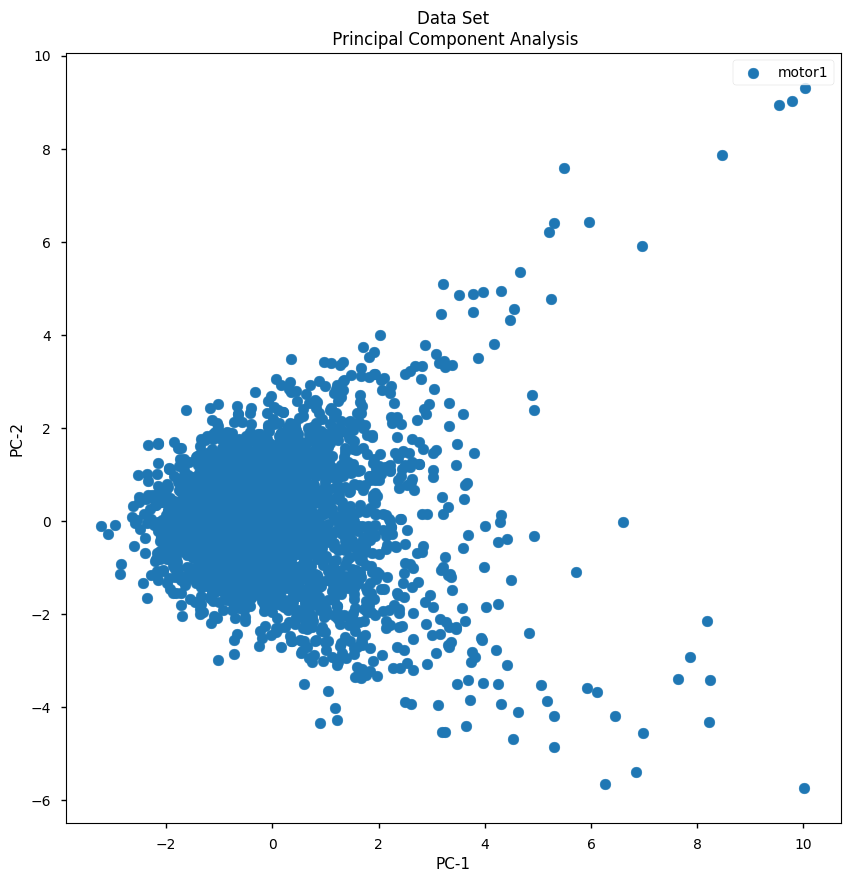

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
  
ab_X = FT_M3.drop(['State'], 1)  #Selecting only the feature
ab_y = FT_M3['State']            #Selecting only the classes

ab_X = StandardScaler().fit_transform(ab_X) # x객체에 x를 표준화한 데이터를 저장

ab_X_pca = PCA(n_components=2).fit_transform(ab_X)

plt.figure(figsize=(10,10))
plt.scatter(ab_X_pca[ab_y.values==2,0], ab_X_pca[ab_y.values==2,1], alpha=1, marker='o', label='motor1', s=60)
#plt.scatter(X_pca[y.values==1,0], X_pca[y.values==1,1], alpha=1, marker='*', label='motor2', s=60)
#plt.scatter(principalDf['x1'], principalDf['x2'], color = 'black', label = 'pca') # 이상데이터 추가

plt.legend()
plt.title('Data Set\n Principal Component Analysis')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
#plt.gca().set_aspect('equal')
plt.show()

# 정상, 이상 차원 축소 데이터 분포

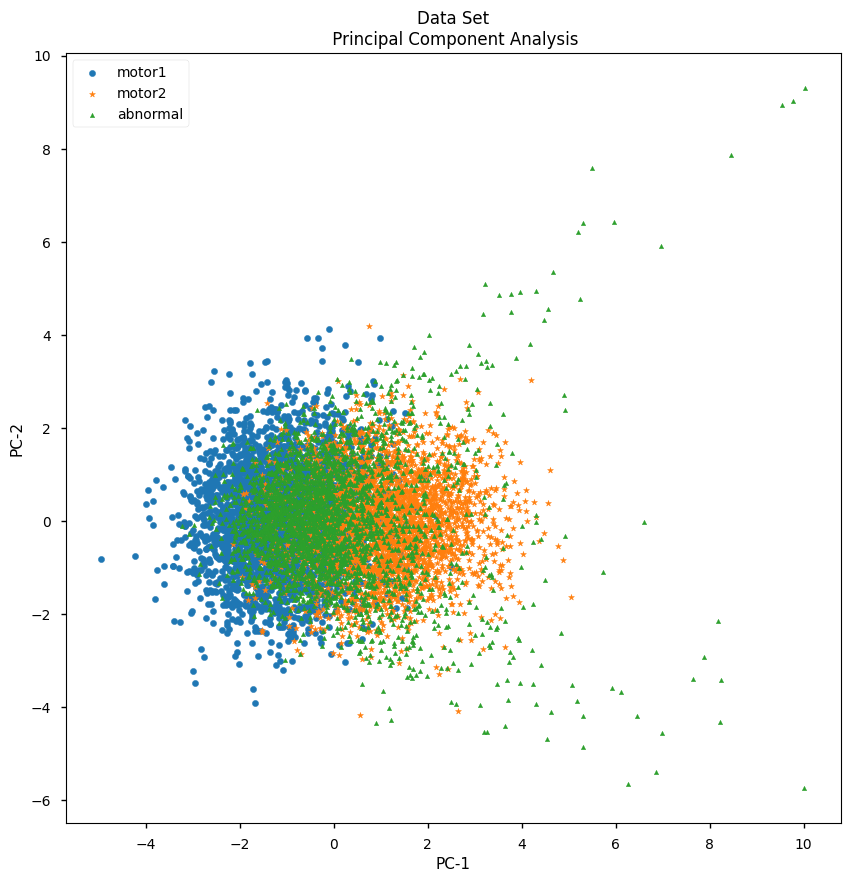

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[y.values==0,0], X_pca[y.values==0,1], alpha=1, marker='o', label='motor1', s=20)
plt.scatter(X_pca[y.values==1,0], X_pca[y.values==1,1], alpha=1, marker='*', label='motor2', s=20)
plt.scatter(ab_X_pca[ab_y.values==2,0], ab_X_pca[ab_y.values==2,1], alpha=1, marker='^', label='abnormal', s=10)

plt.legend()
plt.title('Data Set\n Principal Component Analysis')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
#plt.gca().set_aspect('equal')
plt.show()

# LOF 모델 학습

In [41]:
def train_model(model,train_dataset,batch_size = 100):        
    print("training start")
    before = 0
    for i in tqdm(range(batch_size,len(train_dataset),batch_size)):
        model.fit(train_dataset[before:i])
        before = i

In [42]:
def get_anomaly_scores(clf,data):
    return clf.decision_function(data).reshape(-1,1)

In [103]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2500,novelty=True)

In [104]:
train_model(clf,X_pca,batch_size = 1000)     

training start


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.44it/s]


In [105]:
clf.fit(ab_X_pca)

LocalOutlierFactor(n_neighbors=2500, novelty=True)

In [106]:
anomaly_scores = get_anomaly_scores(clf,X_pca)

In [107]:
outliers = get_anomaly_scores(clf,ab_X_pca)

In [108]:
anomaly_scores = pd.DataFrame(anomaly_scores.reshape(-1) ,columns=['x1'])

In [109]:
outliers = pd.DataFrame(outliers.reshape(-1) ,columns=['x1'])

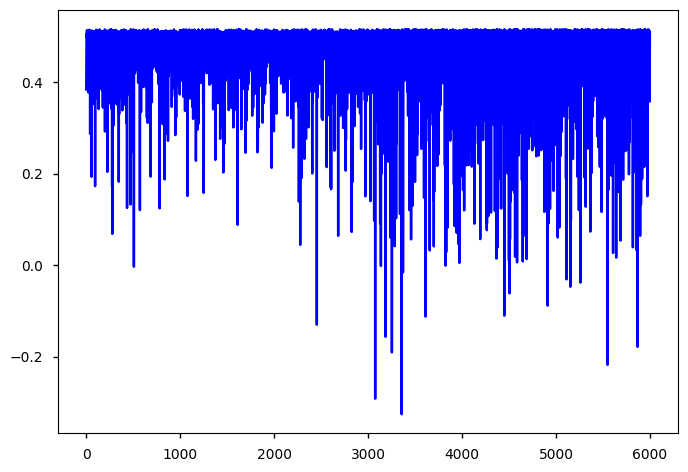

In [110]:
plt.plot(anomaly_scores.index,
         anomaly_scores,
          color='blue', label="normal")

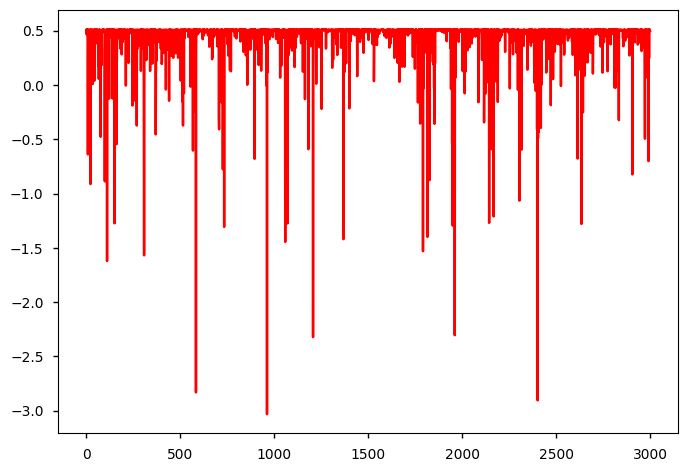

In [111]:
plt.plot(outliers.index,
         outliers,
          color='red', label="anomaly")

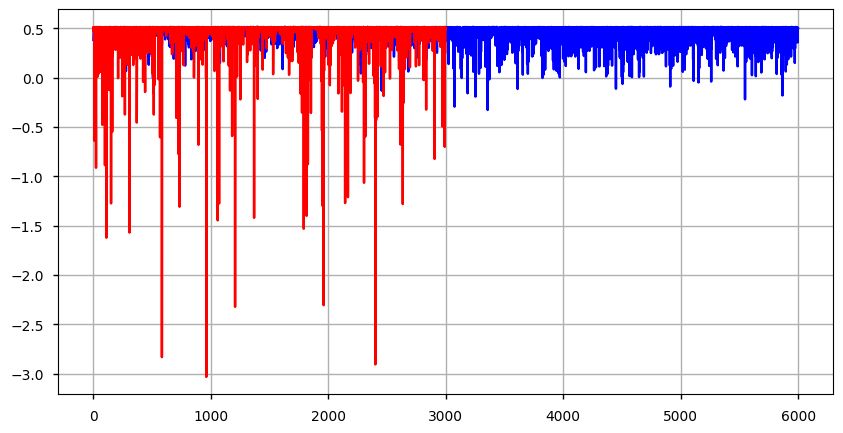

In [114]:
plt.figure(figsize=(10,5))

plt.plot(anomaly_scores.index,
         anomaly_scores,
         color='blue', label="normal")

plt.plot(outliers.index,
         outliers,
         color='red', label="anomaly")

plt.grid()

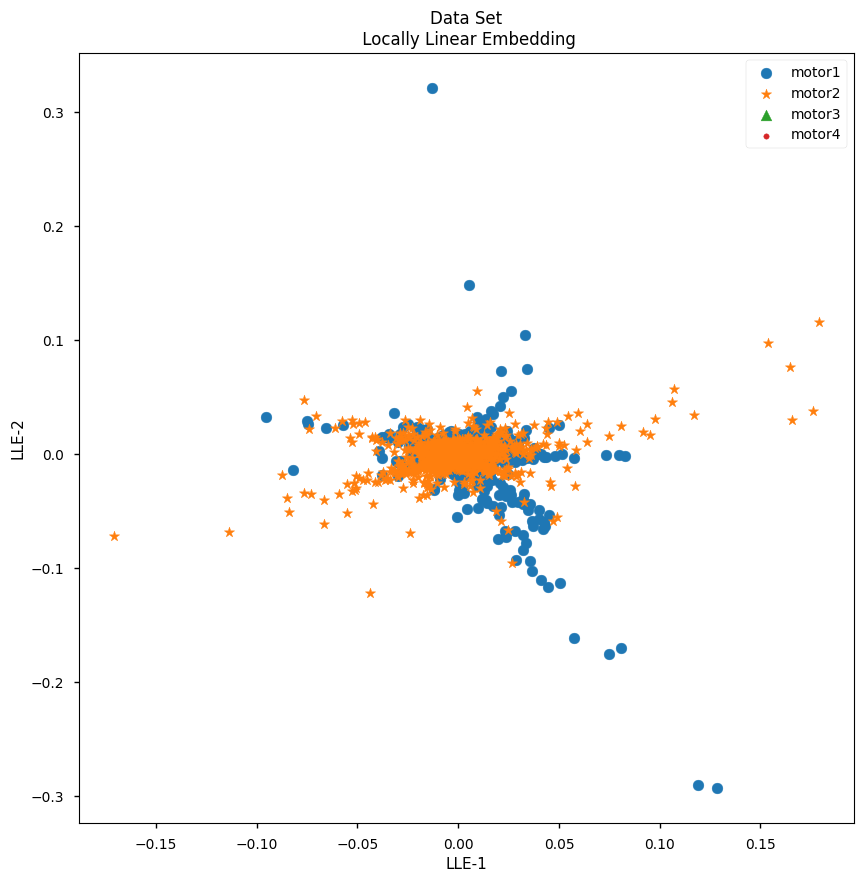

In [48]:
from sklearn.manifold import LocallyLinearEmbedding

X = Feat_reduced.drop(['State'], 1)  #Selecting only the feature
y = Feat_reduced['State']            #Selecting only the classes

X = StandardScaler().fit_transform(X) # x객체에 x를 표준화한 데이터를 저장


embedding = LocallyLinearEmbedding(n_components=3) #result has 2 dimensions

X_LLE= embedding.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X_LLE[y.values==0,0], X_LLE[y.values==0,1], alpha=1, marker='o', label='motor1', s=60)
plt.scatter(X_LLE[y.values==1,0], X_LLE[y.values==1,1], alpha=1, marker='*', label='motor2', s=60)

plt.legend()
plt.title('Data Set\n Locally Linear Embedding')
plt.xlabel('LLE-1')
plt.ylabel('LLE-2')
#plt.gca().set_aspect('equal')
plt.show()

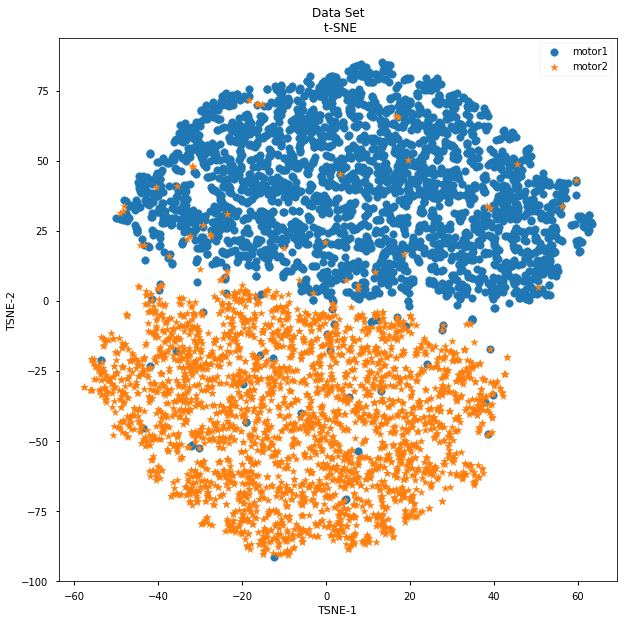

In [235]:
from sklearn.manifold import TSNE

X = Feat_reduced.drop(['State'], 1)  #Selecting only the feature
y = Feat_reduced['State']            #Selecting only the classes

X = StandardScaler().fit_transform(X) # x객체에 x를 표준화한 데이터를 저장

embedding = TSNE(n_components=2) #result has 2 features

X_TSNE= embedding.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X_TSNE[y.values==0,0], X_TSNE[y.values==0,1], alpha=1, marker='o', label='motor1', s=60)
plt.scatter(X_TSNE[y.values==1,0], X_TSNE[y.values==1,1], alpha=1, marker='*', label='motor2', s=60)

plt.legend()
plt.title('Data Set\n t-SNE')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
#plt.gca().set_aspect('equal')
plt.show()

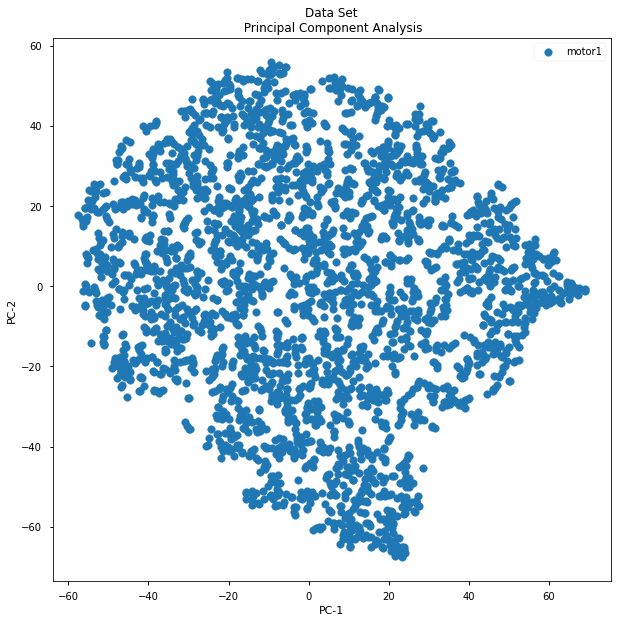

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
  
ab_X = FT_M3.drop(['State'], 1)  #Selecting only the feature
ab_y = FT_M3['State']            #Selecting only the classes

ab_X = StandardScaler().fit_transform(ab_X) # x객체에 x를 표준화한 데이터를 저장

embedding = TSNE(n_components=2) #result has 2 features

ab_X_TSNE= embedding.fit_transform(ab_X)


plt.figure(figsize=(10,10))
plt.scatter(ab_X_TSNE[ab_y.values==2,0], ab_X_TSNE[ab_y.values==2,1], alpha=1, marker='o', label='motor1', s=60)
#plt.scatter(X_pca[y.values==1,0], X_pca[y.values==1,1], alpha=1, marker='*', label='motor2', s=60)
#plt.scatter(principalDf['x1'], principalDf['x2'], color = 'black', label = 'pca') # 이상데이터 추가

plt.legend()
plt.title('Data Set\n Principal Component Analysis')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
#plt.gca().set_aspect('equal')
plt.show()

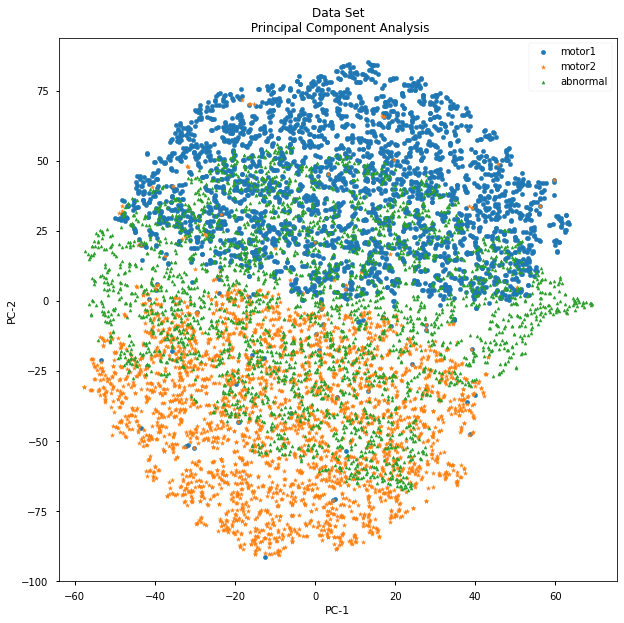

In [237]:
plt.figure(figsize=(10,10))
plt.scatter(X_TSNE[y.values==0,0], X_TSNE[y.values==0,1], alpha=1, marker='o', label='motor1', s=20)
plt.scatter(X_TSNE[y.values==1,0], X_TSNE[y.values==1,1], alpha=1, marker='*', label='motor2', s=20)
plt.scatter(ab_X_TSNE[ab_y.values==2,0],ab_X_TSNE[ab_y.values==2,1], alpha=1, marker='^', label='abnormal', s=10)

plt.legend()
plt.title('Data Set\n Principal Component Analysis')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
#plt.gca().set_aspect('equal')
plt.show()

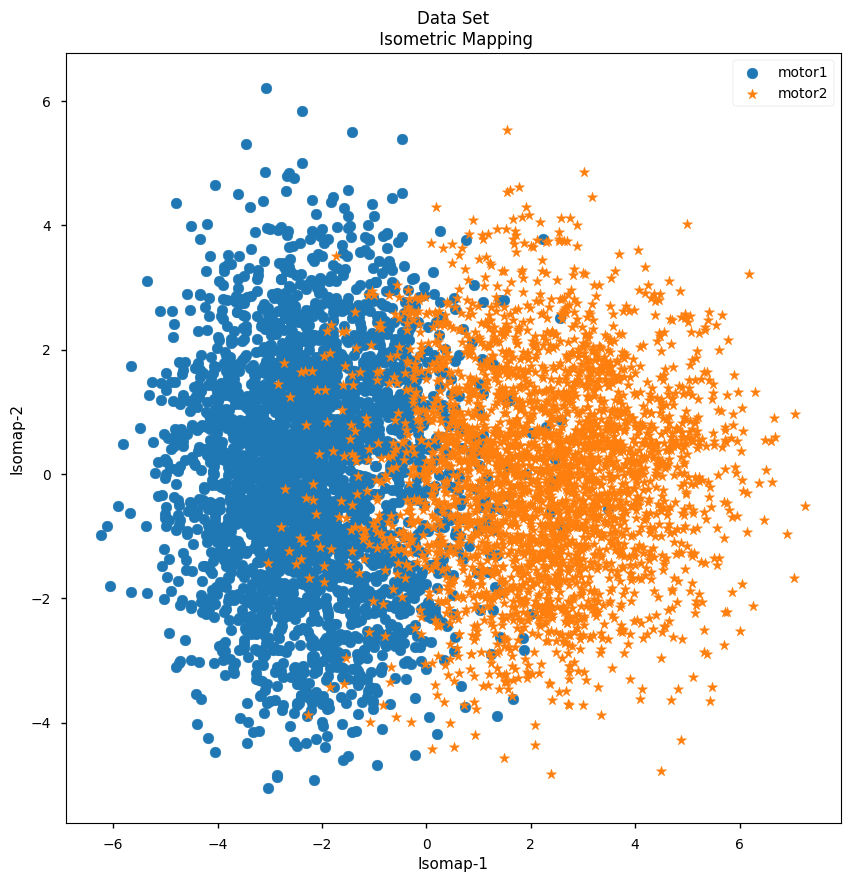

In [51]:
#from sklearn.datasets import load_digits #mnist
from sklearn.manifold import Isomap
#X, _ = load_digits(return_X_y=True) #load data

X = Feat_reduced.drop(['State'], 1)  #Selecting only the feature
y = Feat_reduced['State']            #Selecting only the classes

X = StandardScaler().fit_transform(X) # x객체에 x를 표준화한 데이터를 저장

embedding = Isomap(n_components=3) #result has 2 features

X_Isomap= embedding.fit_transform(X)

plt.figure(figsize=(10,10))
plt.scatter(X_Isomap[y.values==0,0], X_Isomap[y.values==0,1], alpha=1, marker='o', label='motor1', s=60)
plt.scatter(X_Isomap[y.values==1,0], X_Isomap[y.values==1,1], alpha=1, marker='*', label='motor2', s=60)

plt.legend()
plt.title('Data Set\n Isometric Mapping')
plt.xlabel('Isomap-1')
plt.ylabel('Isomap-2')
#plt.gca().set_aspect('equal')
plt.show()